<a href="https://colab.research.google.com/github/marianerod/DesafioIfood/blob/main/An%C3%A1lise_Explorat%C3%B3ria_Ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Ifood

Desafio proposto no módulo de **Estatística Descritiva** do curso EBA - Estatística do Básico ao Avançado da Professora Renata Biaggi. Mais informações, acesse o site: https://renatabiaggi.com/eba/

In [1]:
#Conectando ao google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importando bibliotecas necessárias
import pandas as pd #manipular tabela
import seaborn as sns #manipular grafico
import numpy as np #operações numpy
import matplotlib.pyplot as plt #manipular grafico

In [5]:
#Ler o DataFrame
df = pd.read_csv("/content/mkt_data (3).csv")

# Visualizando os dados



In [6]:
#Visualizando o DataFrame
df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


Visualizamos apenas as 5 primeiras linhas do dataset, porém, não sabemos o que significa cada variável.

# Conhecendo nossos dados

Esta etapa tem por objetivo permitir um entendimento de como os dados do arquivo **mkt_data.csv** estão estruturados. O dataset possui *2205 observações*.

### **Dicionário das Variáveis**:

0. **Unnamed:** Identificador único do respondente.

1. **Income:** Renda familiar anual do cliente.

2. **Kidhome:** Quantidade de crianças pequenas na casa do cliente.

3. **Teenhome:** Quantidade de adolescentes na casa do cliente.

4. **Recency:** Número de dias desde a última compra.

5. **MntWines:** Valor gasto em vinhos nos últimos 2 anos.

6. **MntFruits:** Valor gasto em frutas nos últimos 2 anos.

7. **MntMeatProducts:** Valor gasto em produtos cárneos nos últimos 2 anos.

8. **MntFishProducts:** Valor gasto em produtos pesqueiros nos últimos 2 anos.

9. **MntSweetProducts:** Valor gasto em produtos doces nos últimos 2 anos.

10. **MntGoldProds:** Valor gasto em produtos premium nos últimos 2 anos.

11. **NumDealsPurchases:** Quantidade de compras feitas com desconto.

12. **NumWebPurchases:** Quantidade de compras feitas através da internet.

13. **NumCatalogPurchases:** Quantidade de compras feitas usando catálogo.

14. **NumStorePurchases:** Quantidade de compras feitas diretamente nas lojas.

15. **NumWebVisitsMonth:** Número de visitas ao site da empresa no último mês.

16. **AcceptedCmp3 :** 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário.

17. **AcceptedCmp4 :** 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário.

18. **AcceptedCmp5 :** 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário.

19. **AcceptedCmp1 :** 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário.

20. **AcceptedCmp2 :** 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário.

21. **Complain:** 1 se o cliente reclamou nos últimos 2 anos.

22. **Z_CostContact:** Custo do contato.

23. **Z_Revenue:** Receita.

24. **Response:** 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário.

25. **Age:** Idade.

26. **Customer_Days:** Data de cadastro do cliente na empresa.

27. **marital_Divorced:** Divorciado.

28. **marital_Married:** Casado.

29. **marital_Single:** Solteiro.

30. **marital_Together:** Vivem Juntos.

31. **marital_Widow:** Viúva.

32. **education_2n Cycle:** Nível de educação - ensino médio.

33. **education_Basic:** Nível de educação - básico.

34. **education_Graduation:** Nível de educação - graduação

35. **education_Master:** Nível de educação - mestrado.

36. **education_PhD:** Nível de educação - doutorado.

37. **MntTotal:** Montante total.

38. **MntRegularProds:** Quantidade de produtos Regulares.

39. **AcceptedCmpOverall:**

40. **marital_status:** Estado civil.

41. **education_level:** Nível de educação.

42. **kids:** Filhos.

43. **expenses:** Gastos.



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

# Análise Exploratória

- **Verificando a quantidade de linhas e colunas:**

In [8]:
df.shape

(2205, 44)

2205 linhas (observações) e 44 colunas (variáveis).

- **Quais colunas são numéricas?**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

Temos **11** variáveis do tipo **Float** e **31** variáveis do tipo **Int**.

- **Existem dados duplicados na nossa base?**

In [10]:
# quantidade de valores nulos por coluna
df.isnull().sum()

,0
Unnamed: 0,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0


Temos nulos na base, nas colunas:

- marital_Divorced:        1975
- marital_Married:         1351
- marital_Single:          1728
- marital_Together:        1637
- marital_Widow:           2129
- education_2n Cycle:      2007
- education_Basic:         2151
- education_Graduation:    1092
- education_Master:        1841
- education_PhD:           1729

In [11]:
# valores absolutos preenchidos
df[['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow','education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']].count()


,0
marital_Divorced,230
marital_Married,854
marital_Single,477
marital_Together,568
marital_Widow,76
education_2n Cycle,198
education_Basic,54
education_Graduation,1113
education_Master,364
education_PhD,476


In [12]:
# % de dados preenchidos
df[['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow','education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']].count()/ len(df) *100


,0
marital_Divorced,10.430839
marital_Married,38.730159
marital_Single,21.632653
marital_Together,25.759637
marital_Widow,3.446712
education_2n Cycle,8.979592
education_Basic,2.448980
education_Graduation,50.476190
education_Master,16.507937
education_PhD,21.587302


Colunas com nulos podem indicar que os usuários que responderam essas perguntas, não possuem essas características. Pra isso, vamos contar as ocorrências de um valor em uma dessas colunas:

In [13]:
#Contando as ocorrências de um valor na coluna education_Basic
df.education_Basic.value_counts()

,count
education_Basic,
2.0,54


Na coluna **education_Basic** aparece somente o número 2.0, que aparece 54 vezes.

Portanto, essas colunas podem se tornar um booleano:

In [14]:
#Selecionando colunas com nulos
colunas_com_nulos = ["marital_Divorced"
, "marital_Married"
, "marital_Single"
, "marital_Together"
, "marital_Widow"
, "education_2n Cycle"
, "education_Basic"
, "education_Graduation"
, "education_Master"
, "education_PhD"]

In [15]:
#substituindo por booleano

for item in colunas_com_nulos:
  df["booleano"+str(item)] = np.where(df[item].isnull(), 0, 1)

#se for nulo, substituimos por 0, caso contrário substituimos por 1

In [16]:
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,booleanomarital_Divorced,booleanomarital_Married,booleanomarital_Single,booleanomarital_Together,booleanomarital_Widow,booleanoeducation_2n Cycle,booleanoeducation_Basic,booleanoeducation_Graduation,booleanoeducation_Master,booleanoeducation_PhD
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,0,0,0,0,1,0,0
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,1,0,0,0,0,1,0,0
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,1,0,0,0,1,0,0
3,3,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,1,0,0,0,1,0,0
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,0,1,0,0,0,0,0,1,0,0
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,1,0,0,0,0,0,1
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,1,0,0,0,0,0,0,1,0,0
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,1,0,0,0,0,1,0


Criou-se mais 10 colunas e, substituiram os nulos por 0 e os não nulos por 1.

- **Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?**

In [17]:
df[["Kidhome","Teenhome","Recency", "Age"]].describe()

,Kidhome,Teenhome,Recency,Age
count,2205.000000,2205.000000,2205.000000,2205.000000
mean,0.442177,0.506576,49.009070,51.095692
std,0.537132,0.544380,28.932111,11.705801
min,0.000000,0.000000,0.000000,24.000000
25%,0.000000,0.000000,24.000000,43.000000
50%,0.000000,0.000000,49.000000,50.000000
75%,1.000000,1.000000,74.000000,61.000000
max,2.000000,2.000000,99.000000,80.000000


Selecionei apenas algumas das colunas numéricas do dataset.

# Conhecendo o perfil dos clientes

- **Qual é o maior salário encontrado na nossa base?**

In [19]:
df[["Income"]].max()

,0
Income,113734.0


O maior salário encontrado no nosso dataset é $113.734,00

- **Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem?**

Para analisar essa pergunta vamos utilizar as medidas descritivas como: min, máx, desvio padrão e quartis que possuem na função describe:

In [37]:
df['Income'].describe()

,Income
count,2205.000000
mean,51622.094785
std,20713.063826
min,1730.000000
25%,35196.000000
50%,51287.000000
75%,68281.000000
max,113734.000000


Vamos avaliar o coeficiente de variação para entender o % que varia os salários em torno da média

In [39]:
df["Income"].std()/df["Income"].mean() *100

40.12441554786958

Vamos verificar graficamente como esses valores estão distribuídos:

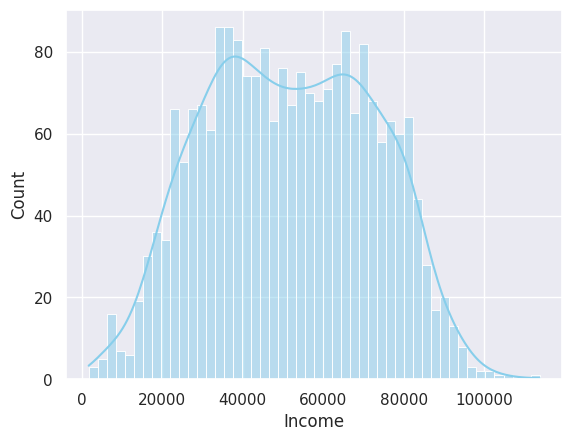

In [41]:
#gráfico de assimetria e dispesão
sns.set(style="darkgrid")
sns.histplot(data=df, x='Income', kde=True, color="skyblue", bins = 50)
plt.show()

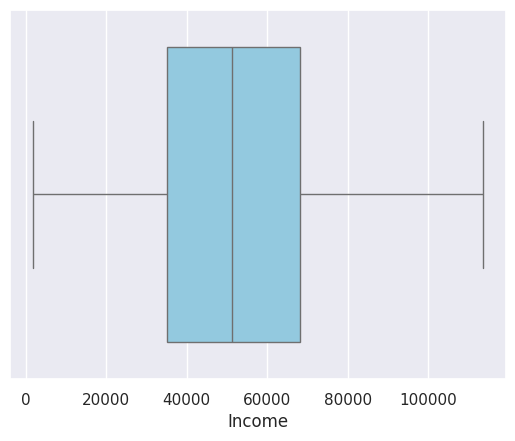

In [42]:
sns.set(style="darkgrid")
sns.boxplot(data=df, x="Income", color="skyblue")
plt.show() #imprimir sem informações abaixo

Através do boxplot e do skew, podemos dizer que a curva se aproxima bastante de uma **distribuição normal**, porém, apresenta uma grande dispersão dos dados.

Os salários parecem bem distribuídos na base, no qual poucas pessoas ganham muito e poucas pessoas ganham pouco (não apresenta outliers).

- **Nossos clientes tem níveis de educação maiores ou menores?**

<Axes: xlabel='education_level', ylabel='count'>

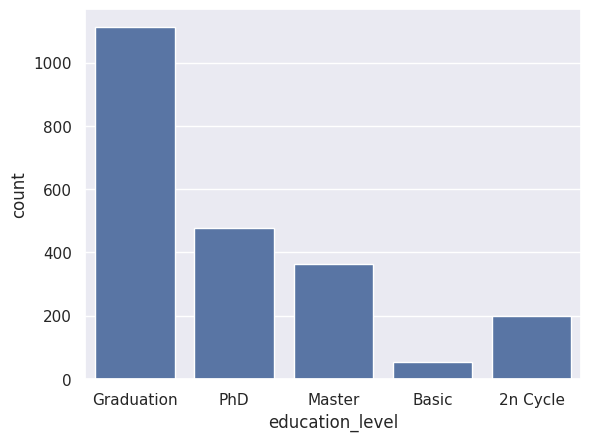

In [46]:
#Gráfico de barras por educação
sns.countplot(x=df["education_level"])

A maioria dos nossos clientes possuem níveis superiores de educação.

- **Quantos clientes temos em cada estado civil?**

<Axes: xlabel='marital_status', ylabel='count'>

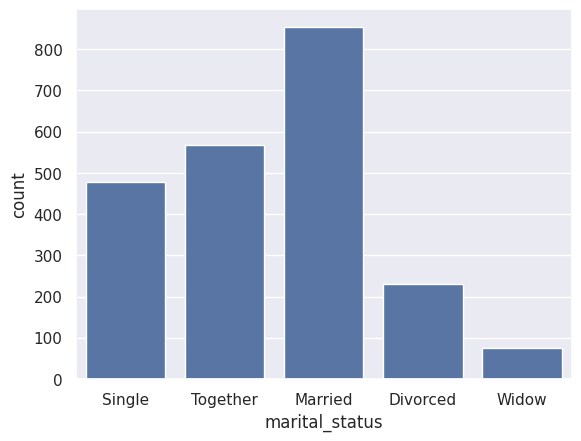

In [45]:
#Gráfico de barras por estado civil
sns.countplot(x=df["marital_status"])

A maioria dos clintes são casados e poucos são viúvos.

# Como os dados se correlacionam

- **Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos?**

<Axes: xlabel='marital_status', ylabel='kids'>

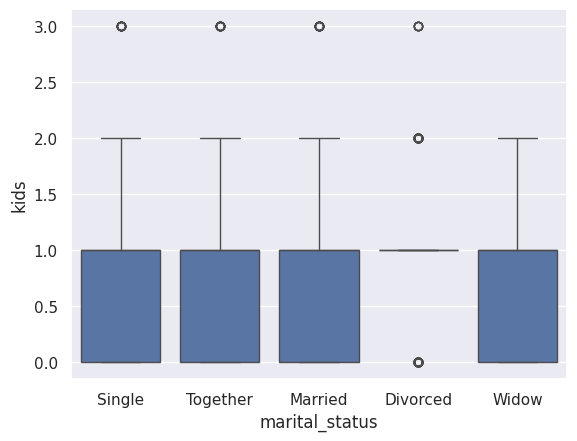

In [47]:
#Verificando a relação entre o estado civil e a quantidade de filhos
sns.boxplot(x="marital_status", y="kids", data=df)

In [30]:
df.groupby(["marital_status"])["kids"].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,230.0,1.008696,0.741716,0.0,1.0,1.0,1.0,3.0
Married,854.0,0.967213,0.732019,0.0,0.0,1.0,1.0,3.0
Single,477.0,0.859539,0.777289,0.0,0.0,1.0,1.0,3.0
Together,568.0,0.980634,0.749823,0.0,0.0,1.0,1.0,3.0
Widow,76.0,0.881579,0.747745,0.0,0.0,1.0,1.0,2.0


Irei calcular a média de filhos por status de união:

In [31]:
df.groupby("marital_status")["kids"].mean()

,kids
marital_status,
Divorced,1.008696
Married,0.967213
Single,0.859539
Together,0.980634
Widow,0.881579


In [32]:
#calculando a mediana de filhos por status de união
df.groupby("marital_status")["kids"].median()

,kids
marital_status,
Divorced,1.0
Married,1.0
Single,1.0
Together,1.0
Widow,1.0


Apesar dos números serem muito próximos, olhando apenas a média dizemos que os clientes solteiros tem uma quantidade menor de filhos quando comparado aos outros grupos.
De acordo com nossa análise descritiva, o estado civil não influencia no número de filhos dos nossos clientes.

- **As pessoas gastam mais ou menos em nossa plataforma quando têm filhos?**

<Axes: xlabel='kids', ylabel='expenses'>

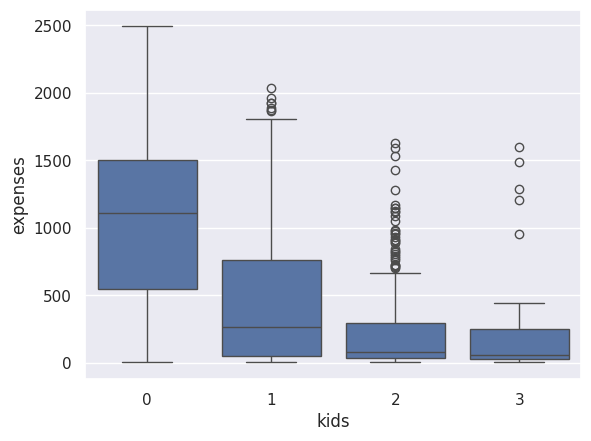

In [48]:
#Verificando a relação entre os gastos e a quantidade de filhos
sns.boxplot(x="kids", y="expenses", data=df)

In [34]:
#calculando a média gastos de acordo com a quantidade de filhos
df.groupby("kids")["expenses"].mean()

,expenses
kids,
0,1041.207006
1,434.530576
2,221.568675
3,237.380000


In [35]:
#calculando a mediana dos gastos de acordo com a quantidade de filhos
df.groupby("kids")["expenses"].median()

,expenses
kids,
0,1106.5
1,264.0
2,84.0
3,62.0


Podemos perceber que tanto a média quanto a mediana, mostram que os clientes que não possuem filhos, gastam em média mais dos que possuem 1 ou mais filhos.

- **Pessoas que têm um maior salário gastam mais?**

Analisando o coeficiente de correlação:

In [50]:
df[['Income','expenses']].corr().round(decimals=2)

,Income,expenses
Income,1.00,0.82
expenses,0.82,1.00


Plotando um gráfico de dispersão para verificar se existe alguma relação.

<Axes: xlabel='Income', ylabel='expenses'>

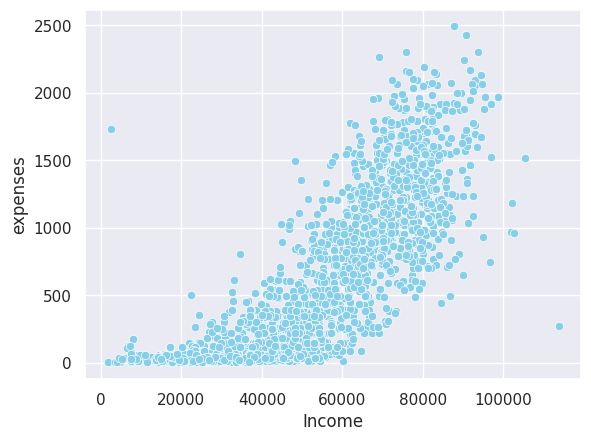

In [52]:
#Gráfico de dispersão mostrando os gastos versus renda familiar anual
sns.scatterplot(data=df, x='Income',y='expenses',color='skyblue')

Aparentemente existe uma correlação diretamente proporcional, em que pessoas que ganham mais também gastam mais.